# Kopen of huren?

Al zolang ik me kan herinneren roept iedereen om mij heen dat een huis kopen absoluut een goede investering is.
In eerste instantie lijkt dit zeer aannemelijk, vooral door de zeer lage hypotheek die men nu kan afsluiten (≈2.0% voor 30 jaar vast).

Wat ik wil vergelijken is, wat beter is voor mijn portemonnee na N jaar:
- een huis kopen met een hypotheek van €`X` per maand
- een huis huren voor €`Y` per maand (waar `X>Y`) en €`(X-Y`) (de rest) maandelijks investeren in de aandelenmarkt

In een simpele berekening kwam ik erachter dat het niet helemaal duidelijk is wat het beste is.
Het is namelijk sterk afhankelijk van hoeveel je huis in waarde stijgt en hoeveel de aandelenmarkt stijgt.
Bij een eerste benadering lijkt het dat als `aandelenmarkt_stijging_pct` ≈ `huis_waarde_stijging_pct`, een huis kopen absoluut een groot voordeel oplevert.
Echter, als de aandelenmarkt het bijvoorbeeld 2% beter doet (wat **zeer** aannemelijk is), is het niet helemaal duidelijk.

"The Devil is in de details," dus het is mijn plan om een realistische benadering te doen, uitgaande van de historische groei in de huizen- en aandelenmarkt, hypotheekrenteaftrek, vermogensbelasting, huis onderhoudskosten, een annuïteitenhypotheek, Monte Carlo simulaties, WOZ-belasting, loonheffing, inkomen, overdrachtsbelasting, statistiek, en meer...

Er zijn een aantal parameters die hierbij relevant zijn:

| parameter | waarde | variabel |
| --- | --- | --- |
| huis prijs | €X | ja |
| hypotheekrente | 2.0% | nee |
| hypotheek duur | 30 jaar | nee |
| hypotheek soort | annuïteitenhypotheek | nee |
| vaste kosten van een huiseigenaar | 1% huiswaarde per jaar | nee |
| huur huis | €Y per maand | ja |
| gemiddelde waardestijging huis | 5% per jaar | ja |
| gemiddelde waardestijging aandelenmarkt | 7% per jaar | ja |
| jaarinkomen | €50k | ja |
| (studie)schulden | €20k | ja |

\* met variabel bedoel ik dat ik de waarde van de parameter wel of niet vast zet in het numerieke experiment.

## Maandlasten van een hypotheek

Mijn aanname dat de maandlasten voor een hypotheek hoger zijn dan bij huren, baseer ik onder andere op de volgende data.

*Gebaseerd op een annuïteitenhypotheek van 2.04% en onderhoudskosten van 1% per jaar, zonder belastingen (zijn later wel meegenomen)*.

In [1]:
import kopen_of_huren
kopen_of_huren.hyptotheek_maandlasten_df()

,maandlasten (€),hypotheek (x€1000)
0,400.0,87.9
1,500.0,109.9
2,600.0,131.9
3,700.0,153.9
4,800.0,175.8
5,900.0,197.8
6,1000.0,219.8
7,1100.0,241.8
8,1200.0,263.8
9,1300.0,285.7


Persoonlijk heb ik altijd huizen gehuurd die duurder waren dan wat in de bovenstaande tabel staat.
Bijvoorbeeld, ik woonde in een huis waar we €1200 per maand betaalde en het huis van de buren werd verkocht voor €450k.

Daarom gebruik ik in de voorbeeld berekeningen hieronder, een hypotheekhoogte van €350k en een huur van €1000. Uiteraard zijn de parameters aan te passen voor ieders situatie.

## Performance huizenmarkt sinds 1996

Ik heb de data van het [CBS](https://opendata.cbs.nl/#/CBS/nl/dataset/83906NED/table) gedownload met alle kwartaal data sinds 1996 en van de "prijsindex" gebruik gemaakt, een index die de prijzenstijging beter weergeeft dan de gemiddelde verkoopprijs.

Het blijkt dat periodes in de afgelopen jaren zowel een flinke daling als een stijgingen gekent hebben.
Een paar voorbeeldjes:

| van | tot | lengte periode | gemiddeld prijsverschil | notities |
| --- | --- | --- | --- | --- |
| 2014Q2 | 2020Q4 | 6 jaar | 6% | de recente 'goede' jaren |
| 2009Q2 | 2014Q1 | 5 jaar | -4.1% | slechtste jaren na de 2008 crisis |
| 2009Q2 | 2020Q4 | 11 jaar | 1.6% | van 2008 crisis tot en met nu |
| 1996Q1 | 2020Q4 | 24 jaar | 5.1% | alle data sinds 1996 tot en met nu |

In [4]:
groei = kopen_of_huren.get_groei(regio="Nederland")

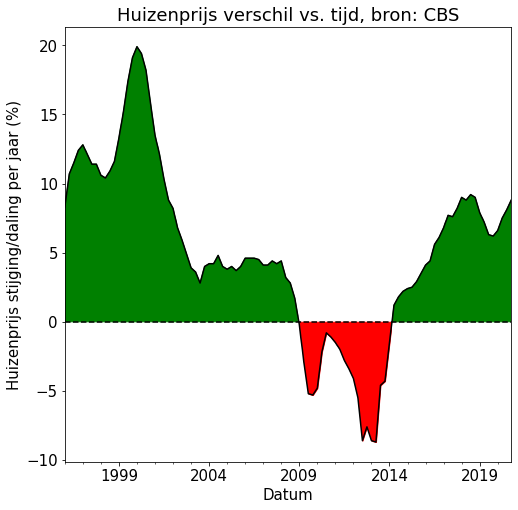

In [3]:
kopen_of_huren.plot_huizenprijzen(groei)

Dit is voor heel Nederland. Ik heb ook data voor:

*(PV) is provincie, (LD) is landsdeel*

In [8]:
for regio in kopen_of_huren.load_huizen_prijsindex_per_regio().columns:
    print(f"- {regio}")

- Nederland
- Noord-Nederland (LD)
- Oost-Nederland (LD)
- West-Nederland (LD)
- Zuid-Nederland (LD)
- Groningen (PV)
- Friesland (PV)
- Drenthe (PV)
- Overijssel (PV)
- Flevoland (PV)
- Gelderland (PV)
- Utrecht (PV)
- Noord-Holland (PV)
- Zuid-Holland (PV)
- Zeeland (PV)
- Noord-Brabant (PV)
- Limburg (PV)
- Amsterdam
- 's-Gravenhage (gemeente)
- Rotterdam
- Utrecht (gemeente)


Zie bijvoorbeeld Rotterdam, waar de huizenprijzen een stuk hoger zijn geworden na 2014 t.o.v. Nederland:

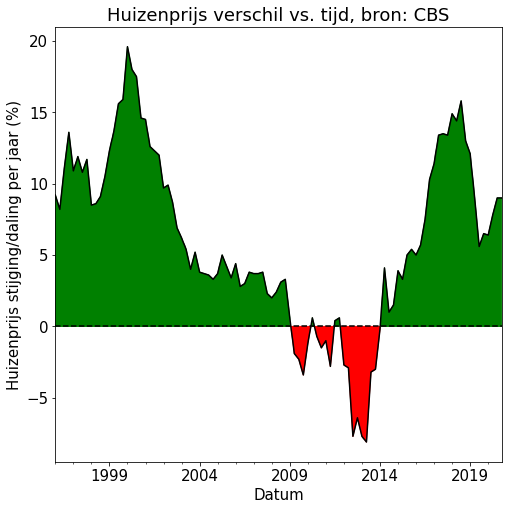

In [10]:
kopen_of_huren.plot_huizenprijzen(kopen_of_huren.get_groei(regio="Rotterdam"))

## Performance aandelenmarkt

Mijn persoonlijke investeringsstrategie is om in de gehele wereldeconomie te investeren.
Zelf doe ik dit bij DeGiro in de [Vanguard VWRL ETF](https://www.vanguardinvestor.co.uk/investments/vanguard-ftse-all-world-ucits-etf-usd-distributing/overview).
Dit fonds bestaat pas sinds 2016, maar ik wil data van langer terug.
Gelukkig is deze index sterk gecorreleerd met de [S&P500](https://en.wikipedia.org/wiki/S%26P_500), waarvan de data gemakkelijk terug te vinden is tot 1950.


Ik heb de data van [Yahoo! Finance](https://finance.yahoo.com/quote/%5EGSPC/history?period1=-1325635200&period2=1588377600&interval=1d&filter=history&frequency=1d) gekopieerd van januari 1970 tot vandaag in een `csv` bestandje geplakt.

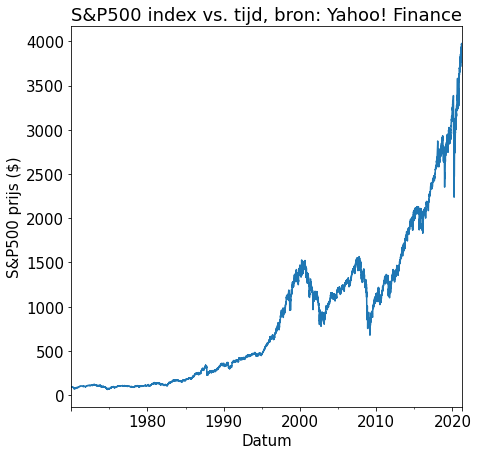

In [11]:
kopen_of_huren.plot_sp500()

Deze data moet ik omzetten naar procent stijging/daling ten opzichte van een jaar geleden, zoals de huizenprijs data van het CBS.

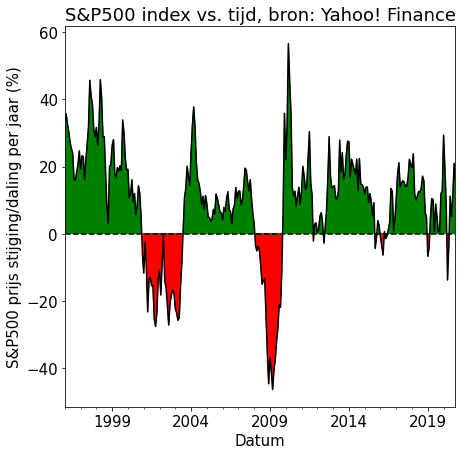

In [12]:
kopen_of_huren.plot_aandelen(groei)

In [13]:
print(
    f"Gemiddelde stijging per jaar sinds {groei.index.min().year} is {groei.aandelen.mean():.2f}%"
)

Gemiddelde stijging per jaar sinds 1996 is 8.82%


Op het eerste oog lijkt de aandelenmarkt een stuk grilliger dan de huizenmarkt, met veel grotere verliezen, maar ook grotere winsten.

Laten we beide in dezelfde grafiek plotten met gemeenschappelijke periodes.

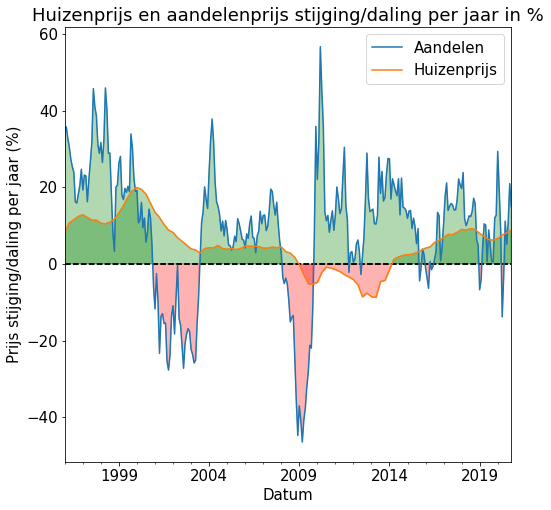

In [14]:
kopen_of_huren.plot_aandelen_en_huis(groei)

In de "Performance huizenmarkt" sectie aan het begin had ik een tabelletje met een aantal periodes waarin het goed of slecht ging. Laten we die periodes met elkaar vergelijken.

In [15]:
kopen_of_huren.vergelijkings_tabel(groei)

,van,tot,lengte periode,huis,aandelen,verschil (🏠 - 📈),notities
0,2014-Q2,2020-Q4,7 jaar,6.01%,9.87% 🏆,-3.86%,de recente 'goede' jaren
1,2009-Q2,2014-Q1,5 jaar,-4.35%,10.77% 🏆,-15.12%,slechtste jaren na de 2008 crisis
2,2009-Q2,2020-Q4,12 jaar,1.60%,10.39% 🏆,-8.79%,van 2008 crisis tot en met nu
3,1996-Q1,2020-Q4,25 jaar,5.11%,8.82% 🏆,-3.72%,alle data sinds 1996 tot en met nu


Uit de bovenstaande tabel, blijkt dat de aandelenmarkt het altijd beter doet voor de geselecteerde periodes.


## Vergelijken

### Voorbeeld aankopen

In [16]:
resultaat = kopen_of_huren.koop_huis_of_beleg("2009-01-01", 11, 350_000, groei, verbose=True)

We hebben op 2009-01-01 een huis van €350k gekocht. Op 2020-01-01 (na 11.0 jaar) hebben we €181k betaald, €105k afgelost, een huiswaarde van €389k, en na een verkoop €44k verlies. Hadden we een huis gehuurd voor €1000 per maand en belegd, dan hadden we €74k. Dat is dus €118k verschil.


In [17]:
resultaat = kopen_of_huren.koop_huis_of_beleg("2015-01-01", 5.7, 350_000, groei, verbose=True)

We hebben op 2015-01-01 een huis van €350k gekocht. Op 2020-09-01 (na 5.7 jaar) hebben we €100k betaald, €52k afgelost, een huiswaarde van €502k, en na een verkoop €94k winst. Hadden we een huis gehuurd voor €1000 per maand en belegd, dan hadden we €27k. Dat is dus €-67k verschil.


Tot nu toe lijkt het erop dat het kopen van een huis in de afgelopen 10 jaar dus niet altijd gunstig uitpakt.

### Monte Carlo: simuleer alle mogelijkheden!

Om een systematischere analyse te doen maak ik gebruik van een [Monte Carlo simulatie](https://www.investopedia.com/terms/m/montecarlosimulation.asp).
Dit is een techniek om impact van risico en onzekerheid in ons model te begrijpen.
Hier simuleren we een groot aantal begin datums en verkoop datums om er achter te komen wat tussen 1996 en 2021 beter had uitgepakt.

In [18]:
PARAMETERS = dict(
    geleend=350_000,
    huur=1000,
    hypotheekrente=2.04,
    hyptotheek_looptijd=360,
    jaarinkomen=90_000,
    schulden=20_000,
    onderhoud_pct=1,
    met_fiscaal_partner=True,
)

In [19]:
df = kopen_of_huren.run_monte_carlo(groei, PARAMETERS)

Hier plotten we de resultaten.
Op de x-as zien we de aankoop datum en op de y-as na hoeveel jaar je het huis verkoopt.
De kleur geeft vervolgens aan hoeveel meer winst je had gemaakt met het kopen van een huis.
Dus hoe roder het wordt, hoe meer je aan een potentiële verkoop van je huis had verdient.
Waar de kleur van rood naar blauw verandert, is het punt waarop investeren beter was.
De grafiek heeft alleen datapunten in de linker onderste driehoek, dit komt omdat het witte gedeelte in de toekomst ligt.

Een paar observaties:
- koop je in 1997 een huis, dan doe je het 18 jaar lang beter dan de aandelenmarkt, maar op dat moment is het ongeveer gelijk
- het blauwe oppervlak (61%) is groter dan het rode oppervlak, dit betekent dat het vaak beter is om aandelen te kopen
- de potentiele winsten zijn groter met het kopen van een huis
- de huizencrisis van 2009 - 2013 lijkt vergaande gevolgen te hebben voor huiseigenaren die misschien al 10 jaar geleden hun huis hadden gekocht

Intuitief zou ik denken dat op de lange termijn, kopen altijd beter zal zijn. Wat echter blijkt is dat er zelfs op de lange termijn niet altijd een duidelijke winnaar is.

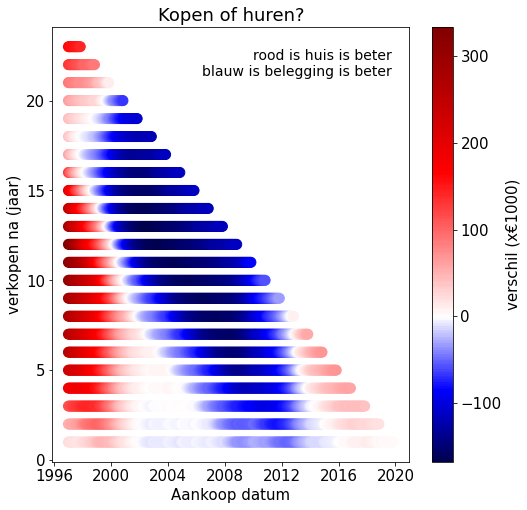

In [42]:
kopen_of_huren.plot_result_scatter(df)

In [60]:
kopen_of_huren.analyseer_data(df)

In 61.3% van alle gevallen is het beter om aandelen te kopen en in 38.7% is het beter om een huis te kopen.
In het geval dat aandelen beter waren, dan is de verwachte winst €49.8k.
Als een huis kopen beter was, dan is de verwachte winst €125.4k.


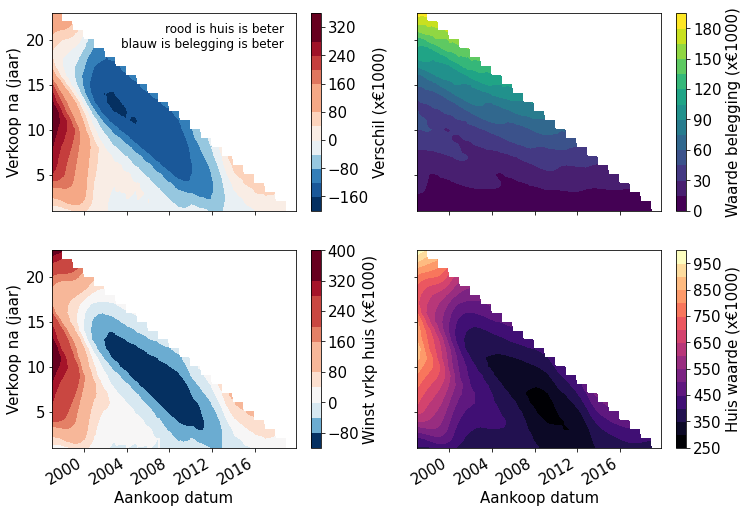

In [21]:
kopen_of_huren.plot_result_contour(df)

In de onderstaande grafiek zien we lijnen die het verschil tussen een huis kopen en beleggen aangeven.
De kleur van de lijn geeft aan na hoe lang je het huis verkoopt.
Zo zien we dat als je de lijn van 8 jaar volgt hij net boven nul uitkomt bij ≈2013.
Dit betekent dat als je in 2013 een huis had gekocht en na 8 jaar wilde verkopen (dus in 2021), je net marginaal beter presteerde dan de aandelenmarkt.

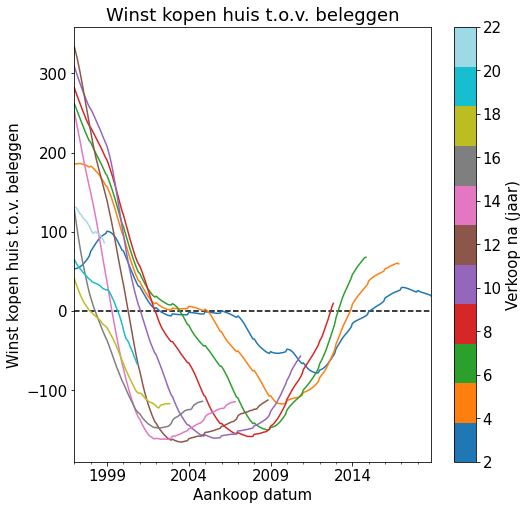

In [61]:
kopen_of_huren.plot_result_lines(df)

## Conclusie

Met de parameters die ik gekozen heb lijkt het erop de laatste 8 jaar het dus een goed idee was om een huis te kopen. Als je ongeveer 10 jaar in een huis wilt wonen, dan had je tussen 2000 en 2013 beter kunnen huren en de rest van je geld kunnen investeren.

### Ik ben nog actief aan het rekenen, de conclusies worden uitgebreid!

## To-do lijstje

- Maak een afschatting van het risco met daarbijhorend winst/verlies